In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/HRData.csv')

In [3]:
df.axes

[RangeIndex(start=0, stop=311, step=1),
 Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
        'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
        'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
        'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
        'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
        'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
        'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
        'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
        'Absences'],
       dtype='object')]

In [4]:
df.shape

(311, 36)

### Basic Counting, Resetting Index

In [5]:
# Find the top recruitment sources of the company
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [6]:
# Get the above output as a DataFrame with columns = 'Recruitment_Source' and 'Count_of_Employees'
# The above data is a Series, so we need to rename the Series Index to 'Recruitment_Source' and then 
# reset index to generate a new column and name the original series column as Count_of_Employees
df['RecruitmentSource'].value_counts().rename_axis('Recruitment_Source').reset_index(name = 'Count_of_Employees')

,Recruitment_Source,Count_of_Employees
0,Indeed,87
1,LinkedIn,76
2,Google Search,49
3,Employee Referral,31
4,Diversity Job Fair,29
5,CareerBuilder,23
6,Website,13
7,Other,2
8,On-line Web application,1


### Counting missing values

In [7]:
# Which columns have a missing value
df.columns[df.isnull().any(axis = 0)]

Index(['DateofTermination', 'ManagerID'], dtype='object')

In [8]:
# Number missing values in these columns
null_columns = df.columns[df.isnull().any(axis = 0)]
df.loc[:,null_columns].isnull().sum()

DateofTermination    207
ManagerID              8
dtype: int64

In [9]:
# % of missing values in these columns
df.loc[:,null_columns].isnull().sum() * 100 / len(df)

DateofTermination    66.559486
ManagerID             2.572347
dtype: float64

In [10]:
# How many rows have nulls
df.isnull().any(axis = 1).sum()

207

In [11]:
# Print those rows and columns
null_rows = df.isnull().any(axis = 1)
null_cols = df.isnull().any(axis = 0)

df.loc[null_rows, null_cols]

,DateofTermination,ManagerID
0,NaN,22.0
3,NaN,16.0
5,NaN,11.0
6,NaN,10.0
7,NaN,19.0
...,...,...
305,NaN,14.0
306,NaN,20.0
308,NaN,2.0
309,NaN,4.0


### Compound filters - use of '&' in filtering

In [12]:
# Find employees hired through LinkedIn and Indeed who get a salary < 100000
selector = (df['RecruitmentSource'].isin(['LinkedIn','Indeed']) ) & (df['Salary'] < 100000)
df.loc[selector,['Employee_Name','RecruitmentSource','Salary']]

,Employee_Name,RecruitmentSource,Salary
0,"Adinolfi, Wilson K",LinkedIn,62506
2,"Akinkuolie, Sarah",LinkedIn,64955
3,"Alagbe,Trina",Indeed,64991
5,"Anderson, Linda",LinkedIn,57568
6,"Andreola, Colby",LinkedIn,95660
...,...,...,...
300,"Whittier, Scott",LinkedIn,58371
304,"Winthrop, Jordan",LinkedIn,70507
305,"Wolk, Hang T",LinkedIn,60446
306,"Woodson, Jason",LinkedIn,65893


### Negation of filters

In [13]:
# Find employees who were terminated with salary > 100,000
row_selector = (~df['DateofTermination'].isnull()) & (df['Salary'] > 100000)
column_selector = ['Employee_Name','DateofTermination','Salary']

df.loc [row_selector,column_selector]

,Employee_Name,DateofTermination,Salary
1,"Ait Sidi, Karthikeyan",6/16/2016,104437
18,"Becker, Renee",9/12/2015,110000
25,"Booth, Frank",2/19/2016,103613
108,"Goble, Taisha",3/15/2015,114800
212,"Patronick, Lucas",9/7/2015,108987
239,"Roehrich, Bianca",11/10/2018,120000
244,"Ruiz, Ricardo",11/4/2015,148999
285,"True, Edward",4/15/2018,100416
292,"Voldemort, Lord",2/22/2017,113999


### Use of dropna()

In [14]:
# Alternate way using dropna
df_term = df.dropna(subset = ['DateofTermination'])
df_term[df_term['Salary'] > 100000][['Employee_Name','DateofTermination','Salary']]

,Employee_Name,DateofTermination,Salary
1,"Ait Sidi, Karthikeyan",6/16/2016,104437
18,"Becker, Renee",9/12/2015,110000
25,"Booth, Frank",2/19/2016,103613
108,"Goble, Taisha",3/15/2015,114800
212,"Patronick, Lucas",9/7/2015,108987
239,"Roehrich, Bianca",11/10/2018,120000
244,"Ruiz, Ricardo",11/4/2015,148999
285,"True, Edward",4/15/2018,100416
292,"Voldemort, Lord",2/22/2017,113999


### Converting data types, fixing "SettingWithCopyWarning", recreating indexes &  plotting with TimeStamp Index

In [15]:
# Convert 'DateofTermination' to Timestamp type 
dt = df.dropna(subset = ['DateofTermination'])
dt['DateofTermination'] = pd.to_datetime(dt['DateofTermination'],format= '%m/%d/%Y')

# We get a SettingWithCopyWarning - Pandas thinks we are working with a "view" of the original df, which is dt
# and then we are doing another indexing on this view dt to update something.
# This may still work, but Pandas warns that this may lead to wrong results.

/var/folders/9b/q8v9585s13j66btsb9qs3my80000gq/T/ipykernel_69642/1633238376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['DateofTermination'] = pd.to_datetime(dt['DateofTermination'],format= '%m/%d/%Y')


In [16]:
dt = df.copy().dropna(subset = ['DateofTermination'])
dt['DateofTermination'] = pd.to_datetime(dt['DateofTermination'],format= '%m/%d/%Y')
dt['DateofTermination'].head(2)

1   2016-06-16
2   2012-09-24
Name: DateofTermination, dtype: datetime64[ns]

In [17]:
# Set the 'DateofTermination' as the dataslice's index to support time series analysis
dt = dt.set_index('DateofTermination')
dt.head(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
DateofTermination,,,,,,,,,,,,,,,,,,,,,
2016-06-16,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2012-09-24,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [18]:
# Group the data based on the TimeStampIndex and find counts per month.
dt.groupby(pd.Grouper(freq='1M'))['EmpID'].count()

DateofTermination
2010-08-31    1
2010-09-30    0
2010-10-31    0
2010-11-30    0
2010-12-31    0
             ..
2018-07-31    1
2018-08-31    3
2018-09-30    2
2018-10-31    0
2018-11-30    1
Freq: M, Name: EmpID, Length: 100, dtype: int64

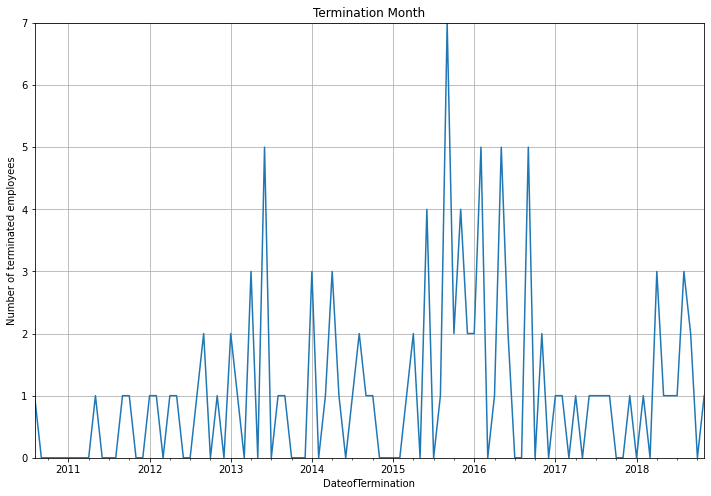

In [19]:
# Show a trend graph of the number of employees leaving per month
dt.groupby(pd.Grouper(freq='1M'))['EmpID'].count().plot(
                                                      figsize=(12, 8),
                                                      title='Termination Month',
                                                      ylabel='Number of terminated employees',
                                                      grid=True
                                                    ).autoscale(axis='both', tight=True)

In [20]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

### Grouping, Aggregating and Filtering

In [21]:
# How many Employees have a PerfScoreID < 2 for each Dept
df[df['PerfScoreID'] <= 2].groupby('DeptID')['PerfScoreID'].count()

DeptID
3     2
4     1
5    23
6     5
Name: PerfScoreID, dtype: int64

In [22]:
# Find employees whose performance score is less than the mean performance score of the Dept
# To do this, we can split this task into steps.

# Step 1 - find mean scores of the Dept for each employee record. 
# The transform function returns a Series of same row count as the original dataframe - it does the aggregation
# for each record. Regular groupby collapses the dataframe to only DeptID's in the indexes.

mean_PerfScoreID = df.groupby('DeptID')['PerfScoreID'].transform(lambda grp: np.mean(grp))
mean_PerfScoreID

0      2.980769
1      3.060000
2      2.980769
3      2.980769
4      2.980769
         ...   
306    2.980769
307    2.980769
308    3.060000
309    3.060000
310    2.980769
Name: PerfScoreID, Length: 311, dtype: float64

In [23]:
# Step 2 - generate a selector function where the actual PerfScoreID of the employee is less than this mean
# This works because the transform() had created a series with same Index values as the original df
# Hence we can compare another column of the original df with this series
row_selector = df['PerfScoreID'] < mean_PerfScoreID
row_selector

0      False
1       True
2      False
3      False
4      False
       ...  
306    False
307     True
308    False
309     True
310    False
Name: PerfScoreID, Length: 311, dtype: bool

In [24]:
# Step 3 - filter the dataframe based on the selector 
df[row_selector][['Employee_Name','DeptID','PerfScoreID']]

,Employee_Name,DeptID,PerfScoreID
1,"Ait Sidi, Karthikeyan",3,3
6,"Andreola, Colby",4,3
9,"Bacong, Alejandro",3,3
18,"Becker, Renee",3,3
23,"Blount, Dianna",5,2
...,...,...,...
297,"Wallace, Theresa",5,2
298,"Wang, Charlie",3,3
299,"Warfield, Sarah",3,3
307,"Ybarra, Catherine",5,1


In [25]:
# Find the top 5 recruitment sources of the company
rec_src = df['RecruitmentSource'].value_counts().head(5).index
rec_src

Index(['Indeed', 'LinkedIn', 'Google Search', 'Employee Referral',
       'Diversity Job Fair'],
      dtype='object')

In [26]:
# find the number of employees per department from these recruiting sources
df[df['RecruitmentSource'].isin(rec_src)].groupby(['DeptID','RecruitmentSource'])['EmpID'].count()

DeptID  RecruitmentSource 
1       Diversity Job Fair     4
        Indeed                 2
2       Indeed                 1
3       Diversity Job Fair     4
        Employee Referral     13
        Google Search          1
        Indeed                19
        LinkedIn              11
4       Diversity Job Fair     2
        Google Search          2
        Indeed                 3
        LinkedIn               2
5       Diversity Job Fair    17
        Employee Referral     16
        Google Search         44
        Indeed                48
        LinkedIn              61
6       Diversity Job Fair     2
        Employee Referral      2
        Google Search          2
        Indeed                14
        LinkedIn               2
Name: EmpID, dtype: int64

<AxesSubplot:xlabel='DeptID'>

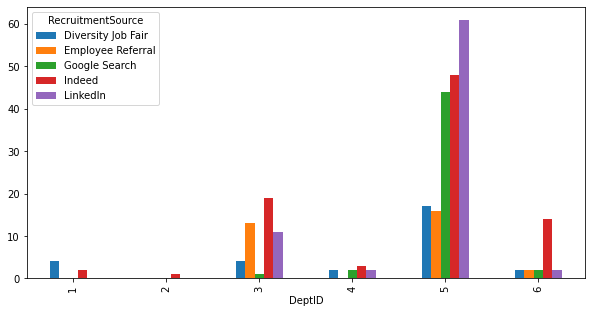

In [27]:
# Plot the above result
# NOTE: the use of unstack function which converts one index level into columns
df[df['RecruitmentSource'].isin(rec_src)] \
        .groupby(['DeptID','RecruitmentSource'])['EmpID'] \
        .count() \
        .unstack() \
        .plot(kind = 'bar', figsize = (10,5))

In [28]:
# For each department, find the most popular Recruitment Source
# using mode function is fast and concise

df.groupby(['DeptID'])['RecruitmentSource'].agg(pd.Series.mode)

DeptID
1    Diversity Job Fair
2                Indeed
3                Indeed
4                Indeed
5              LinkedIn
6                Indeed
Name: RecruitmentSource, dtype: object

In [29]:
# Another way of doing the above - without mode
df.groupby(['DeptID'])['RecruitmentSource'].agg(lambda x:x.value_counts().index[0])

DeptID
1    Diversity Job Fair
2                Indeed
3                Indeed
4                Indeed
5              LinkedIn
6                Indeed
Name: RecruitmentSource, dtype: object

In [30]:
# How to get the top 2 recruitment sources for each department
df.groupby(['DeptID'])['RecruitmentSource'].agg(lambda x:x.value_counts().index[0:2])

DeptID
1    [Diversity Job Fair, Indeed]
2                          Indeed
3     [Indeed, Employee Referral]
4              [Indeed, LinkedIn]
5              [LinkedIn, Indeed]
6               [Indeed, Website]
Name: RecruitmentSource, dtype: object